In [374]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

In [375]:
house_data = pd.read_csv("train.csv")
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [376]:
house_data.shape

(1460, 81)

In [377]:
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [378]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [379]:
# missing values (column-wise) 
house_data.isnull().sum() > 0

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinSF1       False
BsmtFinType2      True
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
1stFlrSF   

In [380]:
# Checking the percentage of missing values 
#round(100*(house_data.isnull().sum()/len(house_data.index)), 2)

percent_missing = house_data.isnull().sum() * 100 / len(house_data)
missing_value_df = pd.DataFrame({'column_name': house_data.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df[missing_value_df['percent_missing']>0]

,column_name,percent_missing
Electrical,Electrical,0.068493
MasVnrType,MasVnrType,0.547945
MasVnrArea,MasVnrArea,0.547945
BsmtQual,BsmtQual,2.534247
BsmtCond,BsmtCond,2.534247
BsmtFinType1,BsmtFinType1,2.534247
BsmtFinType2,BsmtFinType2,2.602740
BsmtExposure,BsmtExposure,2.602740
GarageQual,GarageQual,5.547945
GarageFinish,GarageFinish,5.547945


In [381]:
#dropping columns with lot of missing values ('FireplaceQu','Fence','Alley','MiscFeature','PoolQC') and Id (synthetic attribute )
house_data_1 = house_data.drop(['FireplaceQu','Fence','Alley','MiscFeature','PoolQC', 'Id'], axis=1)

house_data_1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [382]:
#impute median for LotFrontage
house_data_1.LotFrontage = house_data_1.LotFrontage.fillna(house_data_1.LotFrontage.median()) 

#impute missing values of MasVnrArea with median due to some outliers in data shown from Descibe section
house_data_1.MasVnrArea = house_data_1.MasVnrArea.fillna(house_data_1.MasVnrArea.median()) 

#impute missing values of Electrical with mode due to categorical column
house_data_1.Electrical = house_data_1.Electrical.fillna(house_data_1.Electrical.mode()[0])  

#replace Nan values of MasVnrArea with None i.e. No Masonary type
house_data_1.MasVnrType = house_data_1.MasVnrType.fillna('None')

#replace Nan values of BsmtQual with NA i.e. No Basement
house_data_1.BsmtQual = house_data_1.BsmtQual.fillna('NA')

#replace Nan values of BsmtCond with NA i.e. No Basement
house_data_1.BsmtCond = house_data_1.BsmtCond.fillna('NA')

#replace Nan values of BsmtExposure with No i.e. No Exposure
house_data_1.BsmtExposure = house_data_1.BsmtExposure.fillna('No')

#replace Nan values of BsmtFinType1 with NA i.e. No Basement
house_data_1.BsmtFinType1 = house_data_1.BsmtFinType1.fillna('NA')

#replace Nan values of BsmtFinType2 with NA i.e. No Basement
house_data_1.BsmtFinType2 = house_data_1.BsmtFinType2.fillna('NA')

#replace Nan values of GarageType with NA i.e. No Garage
house_data_1.GarageType = house_data_1.GarageType.fillna('NA')

#replace Nan values of GarageYrBlt with 0 i.e. No Garage
house_data_1.GarageYrBlt = house_data_1.GarageYrBlt.fillna(0)

#replace Nan values of GarageFinish with NA i.e. No Garage
house_data_1.GarageFinish = house_data_1.GarageFinish.fillna('NA')

#replace Nan values of GarageFinish with NA i.e. No Garage
house_data_1.GarageQual = house_data_1.GarageQual.fillna('NA')

#replace Nan values of GarageCond with NA i.e. No Garage
house_data_1.GarageCond = house_data_1.GarageCond.fillna('NA')

In [383]:
#check missing values again
house_data_1.isnull().sum()[house_data_1.isnull().sum()>0]

Series([], dtype: int64)

In [384]:
#calculate the age of house i.e. HouseAge from YrSold - YearBuilt 
house_data_1['Age'] = house_data_1.YrSold - house_data_1.YearBuilt

In [385]:
#Drop YrSold, YearBuilt after HouseAge
house_data_2=house_data_1.drop(columns=['YrSold', 'YearBuilt'])

In [386]:
#Map to integer values

#convert MSSubClass into object type 
convert_dict = {'MSSubClass':object}
house_data_2 = house_data_2.astype(convert_dict)

#convert ExterQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data_2 = house_data_2.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

#convert BsmtQual 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
house_data_2 = house_data_2.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

#convert BsmtExposure 0,1,2,3,4 -> NA, No, Mn, Av, gd
house_data_2 = house_data_2.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})

#convert BsmtFinType1 0,1,2,3,4,5,6 -> NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ
house_data_2 = house_data_2.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})

#convert HeatingQC 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data_2 = house_data_2.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

#convert KitchenQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data_2 = house_data_2.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

#convert FireplaceQu 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
house_data_2 = house_data_2.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [387]:
# find biased columns
for col in house_data_2.columns:
    if house_data_2[col].dtype == np.object :
        print(col)
        print(house_data[col].value_counts())

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Street
Pave    1454
Grvl       6
Name: Street, dtype: int64
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     

In [388]:
#Drop columns having more than 90% bias
house_data_3=house_data_2.drop(columns=['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType', 'SaleCondition'])
house_data_3.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,61,0,0,0,0,0,2,208500,5
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,298,0,0,0,0,0,0,5,181500,31
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,42,0,0,0,0,0,9,223500,7
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,35,272,0,0,0,0,2,140000,91
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,192,84,0,0,0,0,0,12,250000,8


In [389]:
# create dummy variable for MSSubClass
MSSubClass_df = pd.get_dummies(house_data_3['MSSubClass'],drop_first=True, prefix='MSSubClass')
house_data_3 = pd.concat([house_data_3,MSSubClass_df],axis=1)

#create dummy variable for MSZoning
MSZoning_df = pd.get_dummies(house_data['MSZoning'],drop_first=True, prefix='MSZoning')
house_data_3 = pd.concat([house_data_3,MSZoning_df],axis=1)

#create dummy variable for LotShape
LotShape_df = pd.get_dummies(house_data_3['LotShape'],drop_first=True, prefix='LotShape')
house_data_3 = pd.concat([house_data_3,LotShape_df],axis=1)

#create dummy variable for LotConfig
LotConfig_df = pd.get_dummies(house_data_3['LotConfig'],drop_first=True, prefix='LotConfig')
house_data_3 = pd.concat([house_data_3,LotConfig_df],axis=1)

#create dummy variable for Neighborhood
Neighborhood_df = pd.get_dummies(house_data_3['Neighborhood'],drop_first=True, prefix='Neighborhood')
house_data_3 = pd.concat([house_data_3,Neighborhood_df],axis=1)

#create dummy variable for HouseStyle
HouseStyle_df = pd.get_dummies(house_data_3['HouseStyle'],drop_first=True, prefix='HouseStyle')
house_data_3 = pd.concat([house_data_3,HouseStyle_df],axis=1)

#create dummy variable for RoofStyle
RoofStyle_df = pd.get_dummies(house_data_3['RoofStyle'],drop_first=True, prefix='RoofStyle')
house_data_3 = pd.concat([house_data_3,RoofStyle_df],axis=1)

#create dummy variable for Exterior1st
Exterior1st_df = pd.get_dummies(house_data_3['Exterior1st'],drop_first=True, prefix='Exterior1st')
house_data_3 = pd.concat([house_data_3,Exterior1st_df],axis=1)

#create dummy variable for Exterior2nd
Exterior2nd_df = pd.get_dummies(house_data_3['Exterior2nd'],drop_first=True, prefix='Exterior2nd')
house_data_3 = pd.concat([house_data_3,Exterior2nd_df],axis=1)

#create dummy variable for MasVnrType
MasVnrType_df = pd.get_dummies(house_data_3['MasVnrType'],drop_first=True, prefix='MasVnrType')
house_data_3 = pd.concat([house_data_3,MasVnrType_df],axis=1)

#create dummy variable for Foundation
Foundation_df = pd.get_dummies(house_data_3['Foundation'],drop_first=True, prefix='Foundation')
house_data_3 = pd.concat([house_data_3,Foundation_df],axis=1)

#create dummy variable for GarageType
GarageType_df = pd.get_dummies(house_data_3['GarageType'],drop_first=True, prefix='GarageType')
house_data_3 = pd.concat([house_data_3,GarageType_df],axis=1)

#create dummy variable for GarageFinish
GarageFinish_df = pd.get_dummies(house_data_3['GarageFinish'],drop_first=True, prefix='GarageFinish')
house_data_3 = pd.concat([house_data_3,GarageFinish_df],axis=1)


In [390]:
#Drop categorical variables after ceating dummy varaibles
house_data_4=house_data_3.drop(columns=['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle'
                                    , 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                                    'GarageType', 'GarageFinish'])

In [391]:
#Test train split
df_train,df_test = train_test_split(house_data_4,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 148)
(439, 148)


In [392]:
# train model
y_train = df_train.pop('SalePrice')
X_train = df_train

X_train.columns


Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       ...
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=147)

In [393]:
#Running RFE with the out variables
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)
rfe = rfe.fit(X_train,y_train)

In [394]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 54),
 ('LotArea', False, 72),
 ('OverallQual', True, 1),
 ('OverallCond', False, 36),
 ('YearRemodAdd', False, 60),
 ('MasVnrArea', False, 64),
 ('ExterQual', False, 31),
 ('BsmtQual', True, 1),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 45),
 ('BsmtFinSF1', False, 71),
 ('BsmtFinSF2', False, 69),
 ('BsmtUnfSF', False, 74),
 ('TotalBsmtSF', False, 70),
 ('HeatingQC', False, 47),
 ('1stFlrSF', False, 58),
 ('2ndFlrSF', False, 56),
 ('LowQualFinSF', False, 57),
 ('GrLivArea', False, 55),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', True, 1),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', False, 39),
 ('KitchenAbvGr', False, 2),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', False, 5),
 ('Fireplaces', False, 8),
 ('GarageYrBlt', False, 59),
 ('GarageCars', True, 1),
 ('GarageArea', False, 66),
 ('WoodDeckSF', False, 63),
 ('OpenPorchSF', False, 65),
 ('EnclosedPorch', False, 67),
 ('3SsnPorch', False, 52),
 ('ScreenPorch', False, 62),
 (

In [395]:
#selected columns from rfe
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'BsmtQual', 'BsmtExposure', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenQual', 'GarageCars',
       'MSSubClass_45', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_90',
       'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR3', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_SWISU',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'HouseStyle_1.5Unf', 'HouseStyle_2.5Unf', 'HouseStyle_SFoyer',
       'RoofStyle_Shed', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard',
       'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood',
       'Exterior1st_Stone', 'Ext

In [396]:
#Build using stats model

X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     68.09
Date:                Mon, 21 Aug 2023   Prob (F-statistic):          1.48e-320
Time:                        08:52:08   Log-Likelihood:                -12047.
No. Observations:                1021   AIC:                         2.424e+04
Df Residuals:                     950   BIC:                         2.459e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.747e+05   2.62e+04     -6.676      0.000   -2.26e+05   -1.23e+05
OverallQual            1.72e+04   1417.115     12.140      0.000    1.44e+04       2e+04
BsmtQual              9739.7141   2157.758      4.514      0.000    5505.191     1.4e+04
BsmtExposure          9317.7258   1261.661      7.385      0.000    6841.762    1.18e+04
BsmtFullBath           1.53e+04   2355.027      6.498      0.000    1.07e+04    1.99e+04
BsmtHalfBath          1.279e+04   4609.957      2.774      0.006    3740.307    2.18e+04
FullBath               2.45e+04   2762.200      8.869      0.000    1.91e+04    2.99e+04
HalfBath              1.388e+04   2533.982      5.477      0.000    8905.077    1.89e+04
KitchenQual           1.531e+04   2409.554      6.352      0.000    1.06e+04       2e+04
GarageCars            1.659e+04   2457.967      6.748      0.000    1.18e+04    2.14e+04
MSSubClass_45        -3.717e+04   2.68e+04     -1.387      0.166   -8.98e+04    1.54e+04
MSSubClass_75          2.44e+04   1.78e+04      1.372      0.170   -1.05e+04    5.93e+04
MSSubClass_80        -2.182e+04   5752.337     -3.793      0.000   -3.31e+04   -1.05e+04
MSSubClass_90        -2.262e+04   6591.512     -3.432      0.001   -3.56e+04   -9687.793
MSSubClass_120       -3.466e+04   5016.229     -6.909      0.000   -4.45e+04   -2.48e+04
MSSubClass_160       -4.644e+04   6441.805     -7.209      0.000   -5.91e+04   -3.38e+04
MSSubClass_180       -4.153e+04   1.61e+04     -2.586      0.010   -7.31e+04      -1e+04
MSSubClass_190       -7987.0016   7551.104     -1.058      0.290   -2.28e+04    6831.770
MSZoning_FV           1.288e+04   1.71e+04      0.751      0.453   -2.07e+04    4.65e+04
MSZoning_RH             3.8e+04   1.67e+04      2.272      0.023    5184.715    7.08e+04
MSZoning_RL           2.315e+04   1.35e+04      1.709      0.088   -3430.648    4.97e+04
MSZoning_RM           2.339e+04   1.38e+04      1.700      0.090   -3617.685    5.04e+04
LotShape_IR3         -8096.9484   1.15e+04     -0.705      0.481   -3.06e+04    1.44e+04
LotConfig_CulDSac      1.09e+04   4530.225      2.407      0.016    2013.552    1.98e+04
LotConfig_FR2        -1.737e+04   6344.392     -2.738      0.006   -2.98e+04   -4922.012
LotConfig_FR3         -2.62e+04   1.98e+04     -1.327      0.185    -6.5e+04    1.26e+04
Neighborhood_BrkSide  9575.3557   6174.953      1.551      0.121   -2542.768    2.17e+04
Neighborhood_ClearCr  2.072e+04   8200.915      2.526      0.012    4621.056    3.68e+04
Neighborhood_Crawfor   4.11e+04   6448.342      6.374      0.000    2.84e+04    5.38e+04
Neighborhood_NoRidge  8.267e+04   6519.727     12.681      0.000    6.99e+04    9.55e+04
Neighborhood_NridgHt  5.655e+04   5628.590     10.046      0.000    4.55e+04    6.76e+04
Neighborhood_SWISU     1.32e+04   8894.710      1.484    

In [397]:
pd.set_option('display.max_rows', None)

#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
print(vif)

                Features     VIF
73       GarageFinish_NA     inf
39   Exterior1st_AsphShn     inf
72         GarageType_NA     inf
54    Exterior2nd_CBlock     inf
51   Exterior2nd_AsphShn     inf
41    Exterior1st_CBlock     inf
0                  const  625.97
67     GarageType_Attchd   90.23
71     GarageType_Detchd   72.78
45   Exterior1st_MetalSd   29.64
58   Exterior2nd_MetalSd   28.51
20           MSZoning_RL   28.28
48   Exterior1st_VinylSd   27.47
69    GarageType_BuiltIn   23.44
61   Exterior2nd_VinylSd   23.10
21           MSZoning_RM   22.19
55   Exterior2nd_CmentBd   19.72
42   Exterior1st_CemntBd   19.11
18           MSZoning_FV   11.31
43   Exterior1st_HdBoard    9.78
56   Exterior2nd_HdBoard    9.61
49   Exterior1st_Wd Sdng    7.36
35     HouseStyle_1.5Unf    7.11
10         MSSubClass_45    7.00
62   Exterior2nd_Wd Sdng    6.61
59   Exterior2nd_Plywood    5.98
68    GarageType_Basment    5.40
46   Exterior1st_Plywood    5.16
32  Neighborhood_Somerst    4.32
1         

In [398]:
# DROP columns with high vif
high_vif_cols = ['GarageFinish_NA','Exterior1st_AsphShn','GarageType_NA','Exterior2nd_CBlock','Exterior2nd_AsphShn','GarageType_Attchd'
                 ,'GarageType_Detchd','Exterior1st_MetalSd','Exterior2nd_MetalSd','MSZoning_RL','Exterior1st_VinylSd','GarageType_BuiltIn'
                ,'Exterior2nd_VinylSd','MSZoning_RM','Exterior2nd_CmentBd','Exterior1st_CemntBd','MSZoning_FV','Exterior1st_HdBoard'
                 ,'Exterior2nd_HdBoard']
X_train_rfe = X_train_rfe.drop(high_vif_cols,axis=1)

In [399]:
#Create again with removed variables

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     85.00
Date:                Mon, 21 Aug 2023   Prob (F-statistic):               0.00
Time:                        08:52:09   Log-Likelihood:                -12070.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     966   BIC:                         2.452e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.231e+05   9607.339    -12.816      0.000   -1.42e+05   -1.04e+05
OverallQual           1.811e+04   1386.344     13.061      0.000    1.54e+04    2.08e+04
BsmtQual              9923.4316   2102.639      4.720      0.000    5797.165     1.4e+04
BsmtExposure          9781.0412   1260.842      7.758      0.000    7306.737    1.23e+04
BsmtFullBath          1.516e+04   2357.327      6.430      0.000    1.05e+04    1.98e+04
BsmtHalfBath          1.275e+04   4650.308      2.743      0.006    3627.983    2.19e+04
FullBath              2.631e+04   2659.019      9.895      0.000    2.11e+04    3.15e+04
HalfBath              1.372e+04   2424.537      5.660      0.000    8964.334    1.85e+04
KitchenQual           1.589e+04   2413.479      6.582      0.000    1.12e+04    2.06e+04
GarageCars            1.228e+04   1933.646      6.349      0.000    8481.237    1.61e+04
MSSubClass_45         -3.13e+04   2.68e+04     -1.169      0.243   -8.38e+04    2.13e+04
MSSubClass_75           3.2e+04   1.76e+04      1.818      0.069   -2535.893    6.65e+04
MSSubClass_80         -2.26e+04   5702.663     -3.963      0.000   -3.38e+04   -1.14e+04
MSSubClass_90        -1.857e+04   6370.129     -2.915      0.004   -3.11e+04   -6067.593
MSSubClass_120       -3.491e+04   4906.811     -7.115      0.000   -4.45e+04   -2.53e+04
MSSubClass_160       -5.086e+04   5859.861     -8.679      0.000   -6.24e+04   -3.94e+04
MSSubClass_180       -2.592e+04    1.5e+04     -1.722      0.085   -5.54e+04    3612.139
MSSubClass_190       -7549.4297   7428.289     -1.016      0.310   -2.21e+04    7028.015
MSZoning_RH           1.564e+04   1.02e+04      1.540      0.124   -4286.743    3.56e+04
LotShape_IR3         -8251.9871   1.16e+04     -0.713      0.476    -3.1e+04    1.44e+04
LotConfig_CulDSac     1.027e+04   4541.268      2.261      0.024    1355.515    1.92e+04
LotConfig_FR2        -1.573e+04   6392.062     -2.461      0.014   -2.83e+04   -3185.254
LotConfig_FR3        -2.769e+04      2e+04     -1.387      0.166   -6.69e+04    1.15e+04
Neighborhood_BrkSide  1.039e+04   6065.762      1.713      0.087   -1515.571    2.23e+04
Neighborhood_ClearCr  2.384e+04   8256.530      2.888      0.004    7641.923       4e+04
Neighborhood_Crawfor  4.075e+04   6352.612      6.415      0.000    2.83e+04    5.32e+04
Neighborhood_NoRidge  8.237e+04   6520.706     12.633      0.000    6.96e+04    9.52e+04
Neighborhood_NridgHt  5.595e+04   5473.695     10.221      0.000    4.52e+04    6.67e+04
Neighborhood_SWISU    9675.7957   8752.977      1.105      0.269   -7501.246    2.69e+04
Neighborhood_Somerst  2.114e+04   5241.201      4.033      0.000    1.09e+04    3.14e+04
Neighborhood_StoneBr  4.353e+04   1.02e+04      4.274      0.000    2.35e+04    6.35e+04
Neighborhood_Veenker  2.963e+04   1.11e+04      2.660    

In [400]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
print(vif)

                Features    VIF
0                  const  82.05
32     HouseStyle_1.5Unf   6.96
10         MSSubClass_45   6.79
41   Exterior1st_Wd Sdng   5.26
48   Exterior2nd_Wd Sdng   5.21
1            OverallQual   3.34
2               BsmtQual   3.18
39   Exterior1st_Plywood   2.87
46   Exterior2nd_Plywood   2.76
11         MSSubClass_75   2.67
33     HouseStyle_2.5Unf   2.67
8            KitchenQual   2.25
43   Exterior2nd_Brk Cmn   2.02
6               FullBath   1.91
50       Foundation_Slab   1.90
36   Exterior1st_BrkComm   1.85
9             GarageCars   1.85
49     Foundation_CBlock   1.81
3           BsmtExposure   1.58
27  Neighborhood_NridgHt   1.45
13         MSSubClass_90   1.42
4           BsmtFullBath   1.36
29  Neighborhood_Somerst   1.35
7               HalfBath   1.31
15        MSSubClass_160   1.31
47     Exterior2nd_Stone   1.30
14        MSSubClass_120   1.29
34     HouseStyle_SFoyer   1.28
45   Exterior2nd_ImStucc   1.27
26  Neighborhood_NoRidge   1.25
28    Ne

In [401]:
# DROP columns with high vif
high_vif_cols = ['HouseStyle_1.5Unf','MSSubClass_45','Exterior1st_Wd Sdng','Exterior2nd_Wd Sdng']
X_train_rfe = X_train_rfe.drop(high_vif_cols,axis=1)


#Create again with removed variables

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     91.44
Date:                Mon, 21 Aug 2023   Prob (F-statistic):               0.00
Time:                        08:52:10   Log-Likelihood:                -12074.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     970   BIC:                         2.450e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.241e+05   9421.329    -13.169      0.000   -1.43e+05   -1.06e+05
OverallQual           1.801e+04   1384.607     13.011      0.000    1.53e+04    2.07e+04
BsmtQual              1.008e+04   2093.927      4.813      0.000    5969.022    1.42e+04
BsmtExposure          9856.9929   1260.711      7.819      0.000    7382.958    1.23e+04
BsmtFullBath          1.544e+04   2355.663      6.552      0.000    1.08e+04    2.01e+04
BsmtHalfBath           1.25e+04   4653.839      2.687      0.007    3371.560    2.16e+04
FullBath              2.677e+04   2638.108     10.148      0.000    2.16e+04    3.19e+04
HalfBath              1.431e+04   2414.950      5.927      0.000    9574.533    1.91e+04
KitchenQual           1.558e+04   2408.684      6.469      0.000    1.09e+04    2.03e+04
GarageCars            1.247e+04   1934.137      6.448      0.000    8675.196    1.63e+04
MSSubClass_75         3.195e+04   1.76e+04      1.814      0.070   -2614.739    6.65e+04
MSSubClass_80        -2.235e+04   5701.777     -3.919      0.000   -3.35e+04   -1.12e+04
MSSubClass_90        -1.891e+04   6370.738     -2.968      0.003   -3.14e+04   -6403.770
MSSubClass_120       -3.428e+04   4903.376     -6.991      0.000   -4.39e+04   -2.47e+04
MSSubClass_160       -5.066e+04   5852.143     -8.656      0.000   -6.21e+04   -3.92e+04
MSSubClass_180       -2.604e+04   1.51e+04     -1.730      0.084   -5.56e+04    3505.241
MSSubClass_190       -6851.6468   7365.583     -0.930      0.352   -2.13e+04    7602.667
MSZoning_RH           1.422e+04   1.01e+04      1.405      0.160   -5640.163    3.41e+04
LotShape_IR3         -8417.9671   1.16e+04     -0.727      0.467   -3.11e+04    1.43e+04
LotConfig_CulDSac     1.061e+04   4537.696      2.338      0.020    1704.258    1.95e+04
LotConfig_FR2        -1.601e+04   6394.262     -2.504      0.012   -2.86e+04   -3464.927
LotConfig_FR3        -2.766e+04      2e+04     -1.385      0.166   -6.68e+04    1.15e+04
Neighborhood_BrkSide  9292.3154   5895.276      1.576      0.115   -2276.649    2.09e+04
Neighborhood_ClearCr  2.321e+04   8193.339      2.833      0.005    7134.865    3.93e+04
Neighborhood_Crawfor   3.91e+04   6300.014      6.207      0.000    2.67e+04    5.15e+04
Neighborhood_NoRidge  8.197e+04   6526.109     12.560      0.000    6.92e+04    9.48e+04
Neighborhood_NridgHt  5.614e+04   5479.192     10.245      0.000    4.54e+04    6.69e+04
Neighborhood_SWISU    1.017e+04   8673.625      1.172      0.241   -6853.503    2.72e+04
Neighborhood_Somerst  2.133e+04   5245.278      4.067      0.000     1.1e+04    3.16e+04
Neighborhood_StoneBr  4.341e+04   1.02e+04      4.258      0.000    2.34e+04    6.34e+04
Neighborhood_Veenker  2.913e+04   1.11e+04      2.615      0.009    7269.480     5.1e+04
HouseStyle_2.5Unf    -3.287e+04   1.97e+04     -1.671    

In [402]:
# DROP columns with high p value
high_vif_cols = ['MSSubClass_190','LotShape_IR3','Neighborhood_SWISU','RoofStyle_Shed','Exterior1st_BrkComm'
                 ,'Exterior1st_Plywood','Exterior1st_Stone','Exterior1st_WdShing','Exterior2nd_Brk Cmn'
                 ,'Exterior2nd_Stone','GarageType_Basment','GarageType_CarPort','Exterior1st_CBlock'
                 ,'Exterior2nd_Plywood','Foundation_Stone']
X_train_rfe = X_train_rfe.drop(high_vif_cols,axis=1)


#Create again with removed variables

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     130.8
Date:                Mon, 21 Aug 2023   Prob (F-statistic):               0.00
Time:                        08:52:10   Log-Likelihood:                -12080.
No. Observations:                1021   AIC:                         2.423e+04
Df Residuals:                     985   BIC:                         2.441e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.228e+05   9042.896    -13.583      0.000   -1.41e+05   -1.05e+05
OverallQual           1.824e+04   1369.576     13.316      0.000    1.55e+04    2.09e+04
BsmtQual              9717.2095   2056.562      4.725      0.000    5681.463    1.38e+04
BsmtExposure          9669.0600   1242.099      7.784      0.000    7231.596    1.21e+04
BsmtFullBath          1.484e+04   2324.553      6.384      0.000    1.03e+04    1.94e+04
BsmtHalfBath          1.233e+04   4624.061      2.665      0.008    3251.242    2.14e+04
FullBath              2.596e+04   2548.426     10.186      0.000     2.1e+04     3.1e+04
HalfBath               1.43e+04   2380.479      6.007      0.000    9628.205     1.9e+04
KitchenQual           1.591e+04   2358.204      6.748      0.000    1.13e+04    2.05e+04
GarageCars            1.232e+04   1894.799      6.501      0.000    8599.410     1.6e+04
MSSubClass_75         3.584e+04   1.73e+04      2.067      0.039    1810.094    6.99e+04
MSSubClass_80        -2.218e+04   5582.582     -3.973      0.000   -3.31e+04   -1.12e+04
MSSubClass_90        -1.793e+04   6087.084     -2.945      0.003   -2.99e+04   -5980.311
MSSubClass_120       -3.485e+04   4864.262     -7.164      0.000   -4.44e+04   -2.53e+04
MSSubClass_160       -5.039e+04   5631.308     -8.949      0.000   -6.14e+04   -3.93e+04
MSSubClass_180       -2.394e+04   1.49e+04     -1.605      0.109   -5.32e+04    5333.910
MSZoning_RH           1.694e+04   9640.396      1.757      0.079   -1979.100    3.59e+04
LotConfig_CulDSac     1.077e+04   4493.044      2.397      0.017    1954.210    1.96e+04
LotConfig_FR2        -1.566e+04   6366.941     -2.460      0.014   -2.82e+04   -3168.416
LotConfig_FR3        -2.711e+04   1.99e+04     -1.361      0.174   -6.62e+04     1.2e+04
Neighborhood_BrkSide  8316.3318   5848.411      1.422      0.155   -3160.445    1.98e+04
Neighborhood_ClearCr  2.415e+04   7956.125      3.036      0.002    8539.988    3.98e+04
Neighborhood_Crawfor  3.993e+04   6195.916      6.444      0.000    2.78e+04    5.21e+04
Neighborhood_NoRidge  8.204e+04   6481.982     12.657      0.000    6.93e+04    9.48e+04
Neighborhood_NridgHt  5.604e+04   5440.209     10.301      0.000    4.54e+04    6.67e+04
Neighborhood_Somerst  2.102e+04   5194.523      4.047      0.000    1.08e+04    3.12e+04
Neighborhood_StoneBr  4.358e+04   1.02e+04      4.290      0.000    2.36e+04    6.35e+04
Neighborhood_Veenker  2.749e+04   1.09e+04      2.516      0.012    6052.418    4.89e+04
HouseStyle_2.5Unf     -3.76e+04   1.94e+04     -1.942      0.052   -7.56e+04     388.689
HouseStyle_SFoyer    -3.069e+04   7572.552     -4.052      0.000   -4.55e+04   -1.58e+04
Exterior1st_ImStucc  -9.642e+04   3.68e+04     -2.623      0.009   -1.69e+05   -2.43e+04
Exterior2nd_BrkFace   2.221e+04   8895.686      2.497    

In [403]:
# DROP columns with high p value
high_vif_cols = ['Foundation_Wood']
X_train_rfe = X_train_rfe.drop(high_vif_cols,axis=1)


#Create again with removed variables

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     134.6
Date:                Mon, 21 Aug 2023   Prob (F-statistic):               0.00
Time:                        08:52:10   Log-Likelihood:                -12080.
No. Observations:                1021   AIC:                         2.423e+04
Df Residuals:                     986   BIC:                         2.440e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.224e+05   9037.163    -13.544      0.000    -1.4e+05   -1.05e+05
OverallQual           1.823e+04   1369.829     13.309      0.000    1.55e+04    2.09e+04
BsmtQual              9802.1810   2055.685      4.768      0.000    5768.161    1.38e+04
BsmtExposure          9622.5799   1241.707      7.749      0.000    7185.887    1.21e+04
BsmtFullBath          1.488e+04   2324.696      6.403      0.000    1.03e+04    1.94e+04
BsmtHalfBath           1.23e+04   4624.914      2.660      0.008    3227.648    2.14e+04
FullBath              2.593e+04   2548.819     10.174      0.000    2.09e+04    3.09e+04
HalfBath              1.444e+04   2378.103      6.070      0.000    9769.267    1.91e+04
KitchenQual           1.576e+04   2354.878      6.691      0.000    1.11e+04    2.04e+04
GarageCars            1.236e+04   1894.779      6.525      0.000    8644.273    1.61e+04
MSSubClass_75         3.577e+04   1.73e+04      2.062      0.039    1731.979    6.98e+04
MSSubClass_80        -2.218e+04   5583.657     -3.973      0.000   -3.31e+04   -1.12e+04
MSSubClass_90        -1.796e+04   6088.179     -2.950      0.003   -2.99e+04   -6014.070
MSSubClass_120        -3.49e+04   4864.947     -7.175      0.000   -4.45e+04   -2.54e+04
MSSubClass_160       -5.051e+04   5631.452     -8.970      0.000   -6.16e+04   -3.95e+04
MSSubClass_180       -2.396e+04   1.49e+04     -1.606      0.109   -5.32e+04    5321.320
MSZoning_RH           1.686e+04   9642.001      1.748      0.081   -2063.798    3.58e+04
LotConfig_CulDSac      1.07e+04   4493.519      2.382      0.017    1883.815    1.95e+04
LotConfig_FR2        -1.576e+04   6367.597     -2.475      0.013   -2.83e+04   -3267.147
LotConfig_FR3        -2.706e+04   1.99e+04     -1.358      0.175   -6.62e+04     1.2e+04
Neighborhood_BrkSide  8198.9630   5848.682      1.402      0.161   -3278.332    1.97e+04
Neighborhood_ClearCr  2.418e+04   7957.614      3.039      0.002    8567.830    3.98e+04
Neighborhood_Crawfor  3.985e+04   6196.755      6.431      0.000    2.77e+04     5.2e+04
Neighborhood_NoRidge  8.184e+04   6480.987     12.628      0.000    6.91e+04    9.46e+04
Neighborhood_NridgHt  5.596e+04   5440.881     10.286      0.000    4.53e+04    6.66e+04
Neighborhood_Somerst   2.09e+04   5194.449      4.023      0.000    1.07e+04    3.11e+04
Neighborhood_StoneBr  4.352e+04   1.02e+04      4.284      0.000    2.36e+04    6.35e+04
Neighborhood_Veenker  2.745e+04   1.09e+04      2.512      0.012    6006.308    4.89e+04
HouseStyle_2.5Unf    -3.767e+04   1.94e+04     -1.945      0.052   -7.57e+04     334.146
HouseStyle_SFoyer    -3.068e+04   7574.009     -4.051      0.000   -4.55e+04   -1.58e+04
Exterior1st_ImStucc  -9.647e+04   3.68e+04     -2.623      0.009   -1.69e+05   -2.43e+04
Exterior2nd_BrkFace   2.223e+04   8897.387      2.498    

In [404]:
# DROP columns with high p value
high_vif_cols = ['MSSubClass_180','LotConfig_FR3','Neighborhood_BrkSide']
X_train_rfe = X_train_rfe.drop(high_vif_cols,axis=1)


#Create again with removed variables

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     146.9
Date:                Mon, 21 Aug 2023   Prob (F-statistic):               0.00
Time:                        08:52:11   Log-Likelihood:                -12084.
No. Observations:                1021   AIC:                         2.423e+04
Df Residuals:                     989   BIC:                         2.439e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.202e+05   8753.845    -13.731      0.000   -1.37e+05   -1.03e+05
OverallQual           1.854e+04   1363.292     13.598      0.000    1.59e+04    2.12e+04
BsmtQual              9425.1331   2034.779      4.632      0.000    5432.154    1.34e+04
BsmtExposure          9432.0195   1239.141      7.612      0.000    7000.372    1.19e+04
BsmtFullBath          1.475e+04   2326.189      6.341      0.000    1.02e+04    1.93e+04
BsmtHalfBath           1.23e+04   4631.400      2.656      0.008    3212.664    2.14e+04
FullBath              2.529e+04   2532.780      9.986      0.000    2.03e+04    3.03e+04
HalfBath              1.419e+04   2374.912      5.976      0.000    9531.534    1.89e+04
KitchenQual            1.55e+04   2349.119      6.598      0.000    1.09e+04    2.01e+04
GarageCars            1.249e+04   1889.196      6.610      0.000    8780.596    1.62e+04
MSSubClass_75         3.515e+04   1.74e+04      2.024      0.043    1067.945    6.92e+04
MSSubClass_80        -2.222e+04   5587.450     -3.976      0.000   -3.32e+04   -1.13e+04
MSSubClass_90        -1.731e+04   6078.012     -2.848      0.004   -2.92e+04   -5382.083
MSSubClass_120       -3.545e+04   4855.144     -7.302      0.000    -4.5e+04   -2.59e+04
MSSubClass_160       -5.113e+04   5625.666     -9.088      0.000   -6.22e+04   -4.01e+04
MSZoning_RH           1.662e+04   9639.135      1.724      0.085   -2296.965    3.55e+04
LotConfig_CulDSac     1.087e+04   4496.773      2.418      0.016    2047.227    1.97e+04
LotConfig_FR2        -1.542e+04   6376.204     -2.418      0.016   -2.79e+04   -2905.414
Neighborhood_ClearCr  2.432e+04   7967.272      3.052      0.002    8681.950       4e+04
Neighborhood_Crawfor  3.946e+04   6201.012      6.364      0.000    2.73e+04    5.16e+04
Neighborhood_NoRidge  8.146e+04   6487.832     12.556      0.000    6.87e+04    9.42e+04
Neighborhood_NridgHt  5.539e+04   5437.650     10.186      0.000    4.47e+04    6.61e+04
Neighborhood_Somerst  2.026e+04   5193.809      3.901      0.000    1.01e+04    3.05e+04
Neighborhood_StoneBr  4.339e+04   1.02e+04      4.266      0.000    2.34e+04    6.34e+04
Neighborhood_Veenker   2.75e+04   1.09e+04      2.513      0.012    6029.310     4.9e+04
HouseStyle_2.5Unf    -3.795e+04   1.94e+04     -1.957      0.051    -7.6e+04     103.006
HouseStyle_SFoyer    -3.424e+04   7305.317     -4.687      0.000   -4.86e+04   -1.99e+04
Exterior1st_ImStucc  -9.762e+04   3.68e+04     -2.651      0.008    -1.7e+05   -2.54e+04
Exterior2nd_BrkFace   2.203e+04   8910.163      2.472      0.014    4544.923    3.95e+04
Exterior2nd_ImStucc   3.813e+04   1.31e+04      2.917      0.004    1.25e+04    6.38e+04
Foundation_CBlock     1.402e+04   2697.308      5.197      0.000    8725.592    1.93e+04
Foundation_Slab       3.751e+04   1.08e+04      3.485    

In [405]:
# DROP columns with high p value
high_vif_cols = ['MSZoning_RH']
X_train_rfe = X_train_rfe.drop(high_vif_cols,axis=1)


#Create again with removed variables

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     151.4
Date:                Mon, 21 Aug 2023   Prob (F-statistic):               0.00
Time:                        08:52:11   Log-Likelihood:                -12085.
No. Observations:                1021   AIC:                         2.423e+04
Df Residuals:                     990   BIC:                         2.439e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.189e+05   8727.996    -13.619      0.000   -1.36e+05   -1.02e+05
OverallQual           1.859e+04   1364.257     13.629      0.000    1.59e+04    2.13e+04
BsmtQual              9387.6622   2036.688      4.609      0.000    5390.940    1.34e+04
BsmtExposure          9423.6398   1240.365      7.597      0.000    6989.593    1.19e+04
BsmtFullBath           1.47e+04   2328.309      6.313      0.000    1.01e+04    1.93e+04
BsmtHalfBath          1.216e+04   4635.237      2.622      0.009    3059.259    2.13e+04
FullBath              2.535e+04   2535.079     10.000      0.000    2.04e+04    3.03e+04
HalfBath              1.407e+04   2376.228      5.921      0.000    9407.368    1.87e+04
KitchenQual            1.53e+04   2348.578      6.515      0.000    1.07e+04    1.99e+04
GarageCars            1.219e+04   1883.019      6.472      0.000    8492.359    1.59e+04
MSSubClass_75         3.487e+04   1.74e+04      2.006      0.045     755.932     6.9e+04
MSSubClass_80        -2.228e+04   5592.904     -3.983      0.000   -3.33e+04   -1.13e+04
MSSubClass_90        -1.684e+04   6078.056     -2.771      0.006   -2.88e+04   -4916.452
MSSubClass_120       -3.504e+04   4853.924     -7.218      0.000   -4.46e+04   -2.55e+04
MSSubClass_160       -5.127e+04   5630.662     -9.105      0.000   -6.23e+04   -4.02e+04
LotConfig_CulDSac     1.079e+04   4500.986      2.397      0.017    1954.993    1.96e+04
LotConfig_FR2        -1.558e+04   6381.861     -2.441      0.015   -2.81e+04   -3056.132
Neighborhood_ClearCr  2.427e+04   7975.157      3.043      0.002    8619.151    3.99e+04
Neighborhood_Crawfor  3.973e+04   6205.239      6.403      0.000    2.76e+04    5.19e+04
Neighborhood_NoRidge  8.151e+04   6494.227     12.551      0.000    6.88e+04    9.43e+04
Neighborhood_NridgHt  5.532e+04   5442.897     10.163      0.000    4.46e+04     6.6e+04
Neighborhood_Somerst  2.017e+04   5198.715      3.880      0.000    9967.266    3.04e+04
Neighborhood_StoneBr   4.31e+04   1.02e+04      4.234      0.000    2.31e+04    6.31e+04
Neighborhood_Veenker  2.761e+04    1.1e+04      2.521      0.012    6119.457    4.91e+04
HouseStyle_2.5Unf    -3.829e+04   1.94e+04     -1.973      0.049   -7.64e+04    -198.121
HouseStyle_SFoyer     -3.38e+04   7308.114     -4.625      0.000   -4.81e+04   -1.95e+04
Exterior1st_ImStucc   -9.74e+04   3.69e+04     -2.642      0.008    -1.7e+05   -2.51e+04
Exterior2nd_BrkFace   2.178e+04   8917.885      2.443      0.015    4283.112    3.93e+04
Exterior2nd_ImStucc   3.786e+04   1.31e+04      2.894      0.004    1.22e+04    6.35e+04
Foundation_CBlock     1.372e+04   2694.257      5.091      0.000    8428.598     1.9e+04
Foundation_Slab        3.76e+04   1.08e+04      3.490      0.001    1.65e+04    5.87e+04
=========================================================

In [406]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
print(vif)

                Features    VIF
0                  const  67.43
1            OverallQual   3.22
2               BsmtQual   2.97
24     HouseStyle_2.5Unf   2.59
10         MSSubClass_75   2.59
8            KitchenQual   2.12
30       Foundation_Slab   1.78
9             GarageCars   1.75
6               FullBath   1.73
29     Foundation_CBlock   1.57
3           BsmtExposure   1.53
20  Neighborhood_NridgHt   1.43
21  Neighborhood_Somerst   1.32
4           BsmtFullBath   1.32
12         MSSubClass_90   1.29
13        MSSubClass_120   1.26
7               HalfBath   1.25
19  Neighborhood_NoRidge   1.24
14        MSSubClass_160   1.21
26   Exterior1st_ImStucc   1.18
28   Exterior2nd_ImStucc   1.18
25     HouseStyle_SFoyer   1.17
22  Neighborhood_StoneBr   1.15
23  Neighborhood_Veenker   1.13
11         MSSubClass_80   1.12
5           BsmtHalfBath   1.11
27   Exterior2nd_BrkFace   1.09
17  Neighborhood_ClearCr   1.08
15     LotConfig_CulDSac   1.08
16         LotConfig_FR2   1.06
18  Neig

## Residual analysis of Train Data

In [408]:
y_train_pred = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

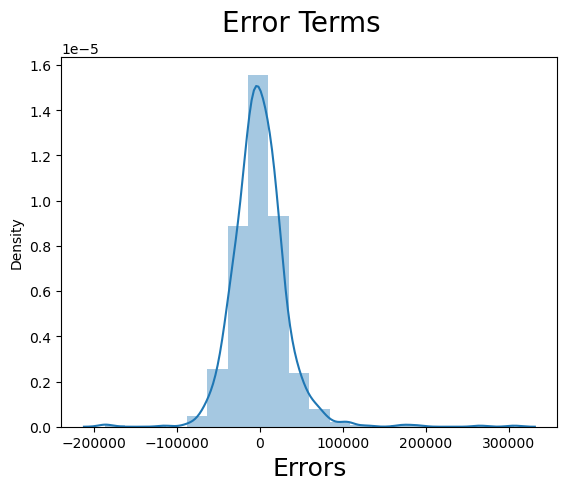

In [409]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

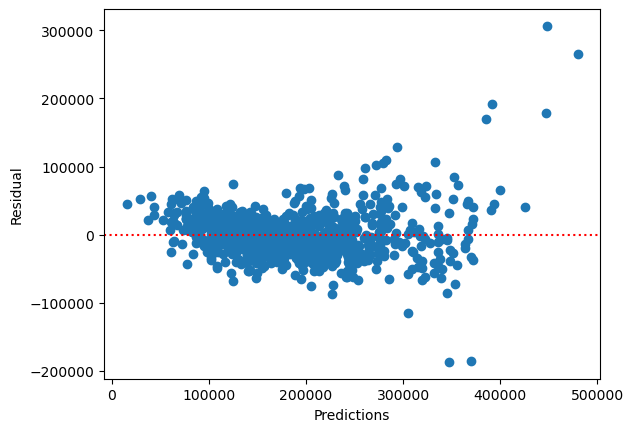

In [410]:

y_res = (y_train - y_train_pred)

plt.scatter( y_train_pred , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

In [430]:
#Collate metrics 

y_pred_train = lm.predict(X_train_rfe)
# y_pred_test = test_lm.predict(X_test_new)
y_pred_test = y_pred

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8210585657136413
0.8035725338930187
1141978556096.5825
555050029202.5479
1118490260.6234891
1264350863.7871249


# Prediction in test data

In [412]:
X_train_rfe.columns

Index(['const', 'OverallQual', 'BsmtQual', 'BsmtExposure', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenQual', 'GarageCars',
       'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_90', 'MSSubClass_120',
       'MSSubClass_160', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'HouseStyle_2.5Unf', 'HouseStyle_SFoyer',
       'Exterior1st_ImStucc', 'Exterior2nd_BrkFace', 'Exterior2nd_ImStucc',
       'Foundation_CBlock', 'Foundation_Slab'],
      dtype='object')

In [413]:
#create y_test and X_test
y_test = df_test.pop('SalePrice')
X_test = df_test

X_train_rfe_new = X_train_rfe.drop(['const'],axis=1)
X_test_new = X_test[X_train_rfe_new.columns]
X_test_new = sm.add_constant(X_test_new)

Text(0, 0.5, 'y_pred')

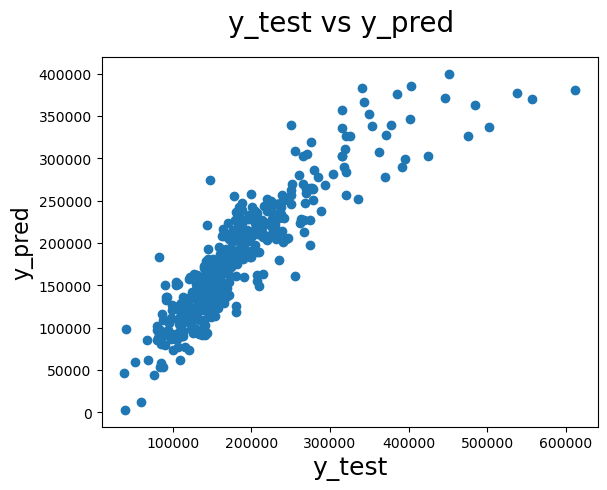

In [414]:
# Making predictions
y_pred = lm.predict(X_test_new)

# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

In [415]:
X_test_new.columns

Index(['const', 'OverallQual', 'BsmtQual', 'BsmtExposure', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenQual', 'GarageCars',
       'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_90', 'MSSubClass_120',
       'MSSubClass_160', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'HouseStyle_2.5Unf', 'HouseStyle_SFoyer',
       'Exterior1st_ImStucc', 'Exterior2nd_BrkFace', 'Exterior2nd_ImStucc',
       'Foundation_CBlock', 'Foundation_Slab'],
      dtype='object')

## Ridge regression 

In [417]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [418]:
print(model_cv.best_params_)

{'alpha': 4.0}


In [419]:
#Fitting Ridge model for alpha = 4 and printing coefficients
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[     0.          19657.41943738   7946.00204939   9481.72192405
  14785.19719858  10742.5860459   24973.51743977  14170.01981088
  16156.95876959  12765.85841962  10836.20811769 -19753.52547885
 -13408.47075531 -29958.26648733 -44867.51647309  11610.65630267
 -13139.64897315  19719.19557292  33404.45397016  68547.52377086
  46487.35705444  14070.22240973  27139.82325951  17865.55897556
 -12059.70455692 -28722.70865765 -13730.09275208  17589.33743863
  17940.07920664  12151.82917354  25713.80859976]


In [421]:
# Calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8176307802843824
0.7969961716800477
1163854190829.9543
573633021238.7434
1139915955.759015
1306681141.773903


## Lasso Regression

In [423]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [424]:
print(model_cv.best_params_)

{'alpha': 100}


In [426]:
#Fitting Ridge model for alpha = 100 and printing coefficients

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 

lasso.coef_

array([     0.        ,  19455.59285868,   7757.94348835,   9523.8187212 ,
        14450.35549803,   9846.5243855 ,  24658.94070964,  13992.35368923,
        16216.13976168,  12469.47236406,      0.        , -18480.72567418,
       -11673.09713428, -30206.99717662, -46529.59191783,  10781.65018713,
       -11357.07261464,  19360.43806582,  34831.68557853,  74883.81384116,
        49200.79779878,  14669.89821371,  29233.54281357,  15907.96327448,
           -0.        , -28996.58872957,     -0.        ,  16015.5145333 ,
        11384.32336869,  11961.33832564,  24183.06303304])

In [427]:
# Calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8171451851599603
0.7964581229839895
1166953189232.6814
575153398965.8418
1142951213.7440562
1310144416.778683


In [431]:
# Collate all metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.210586e-01,8.176308e-01,8.171452e-01
1,R2 Score (Test),8.035725e-01,7.969962e-01,7.964581e-01
2,RSS (Train),1.141979e+12,1.163854e+12,1.166953e+12
3,RSS (Test),5.550500e+11,5.736330e+11,5.751534e+11
4,MSE (Train),3.344384e+04,3.376264e+04,3.380756e+04
5,MSE (Test),3.555771e+04,3.614804e+04,3.619592e+04


# Features and coefficients after regularization 

In [434]:
betas = pd.DataFrame(index=X_train_rfe.columns)
betas.rows = X_train_rfe.columns
betas['Linear'] = lm.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

betas.head(68)

,Linear,Ridge,Lasso
const,-118863.273979,0.000000,0.000000
OverallQual,18594.026891,19657.419437,19455.592859
BsmtQual,9387.662159,7946.002049,7757.943488
BsmtExposure,9423.639817,9481.721924,9523.818721
BsmtFullBath,14697.863499,14785.197199,14450.355498
BsmtHalfBath,12155.277736,10742.586046,9846.524385
FullBath,25350.957250,24973.517440,24658.940710
HalfBath,14070.389868,14170.019811,13992.353689
KitchenQual,15299.960652,16156.958770,16216.139762
GarageCars,12187.525574,12765.858420,12469.472364


### Question 1 : 

Q. What is the optimal value of alpha for ridge and lasso regression? 

A. Alpha for ridge : 4
   Alpha for lasso : 100



Q. What will be the changes in the model if you choose double the value of alpha for both ridge and lasso?

A. As alpha value increased r2score dropped by ~1% in both test and train data for both regression. Details below.

In [437]:
#earlier for Ridge alpha = 4 now take 8
alpha = 8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)


[     0.          20387.18317021   7235.59194013   9399.5139505
  14738.72312218   9665.85698905  24532.27734607  14020.05383031
  16526.78545996  13239.1050453    6093.51398188 -17828.40029972
 -11323.81364473 -26769.17600067 -40301.67772525  11743.99267286
 -11557.55507988  16593.95375596  29064.05276125  60356.97563072
  40470.87652072  10213.00902782  19013.39210133  13081.06817078
  -7224.19636427 -25104.20361099  -6473.66409867  14707.96478906
  12873.98308089  11106.25031146  19497.540792  ]
0.8136515312895972
0.791952411567896


In [438]:
#earlier for Lasso alpha = 100 now take 200
alpha =200

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 
print(lasso.coef_)
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[     0.          20344.33692251   6295.38941981   9519.06067104
  14121.1729728    7463.08536212  23799.81677444  13707.00494174
  16822.05340662  12899.00391515      0.         -14834.92592232
  -6725.17836895 -25595.06753044 -42097.16799382  10702.87321819
  -7187.71446924  14049.62016157  30222.63802554  70479.26721732
  43415.86154647   9478.58646133  15792.11773168   4570.82025556
     -0.         -24579.14127288     -0.          10402.35735767
      0.          10279.37944094  11384.37630736]
0.8118472176955804
0.788740692101558


Q. What will be the most important predictor variables after the change is implemented?

A. Neighborhood_NoRidge

In [448]:
# Collate all metrics

betas_new = pd.DataFrame(index=X_train_rfe.columns)
betas_new.rows = X_train_rfe.columns
betas_new['Linear'] = lm.params
betas_new['Ridge'] = ridge.coef_
betas_new['Lasso'] = lasso.coef_

betas_new.head(100)

,Linear,Ridge,Lasso
const,-118863.273979,0.000000,0.000000
OverallQual,18594.026891,20387.183170,20344.336923
BsmtQual,9387.662159,7235.591940,6295.389420
BsmtExposure,9423.639817,9399.513950,9519.060671
BsmtFullBath,14697.863499,14738.723122,14121.172973
BsmtHalfBath,12155.277736,9665.856989,7463.085362
FullBath,25350.957250,24532.277346,23799.816774
HalfBath,14070.389868,14020.053830,13707.004942
KitchenQual,15299.960652,16526.785460,16822.053407
GarageCars,12187.525574,13239.105045,12899.003915


### Question 3:

Q. Drop the Top 5 features and rebuild lasso.

A. After dropping top 5 features. Model r2 reduce significantly to 76%. Details below.

In [455]:
#Drop 5 features

drop_cols = ['Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Crawfor', 'MSSubClass_120'
                               , 'HouseStyle_SFoyer']

X_train_new = X_train_rfe.drop(drop_cols, axis=1)
X_test_new = X_test_new.drop(drop_cols, axis=1)


lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 100}


In [456]:
#Fitting Ridge model for alpha = 100

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=100)

In [457]:
lasso.coef_

array([     0.        ,  23980.70307011,   6132.5223563 ,   7847.23298459,
        15172.94832736,   6683.88681892,  27147.1181178 ,  18064.95080659,
        17702.37360377,  14962.18641341,      0.        , -19816.53879235,
       -15092.31233248, -46097.74380918,  11413.88605203,  -8700.49420843,
        15070.00117063,      0.        ,      0.        ,      0.        ,
           -0.        ,     -0.        ,  12684.13933054,  18231.11594522,
        11186.46131432,  21702.91217562])

In [458]:
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.7621247104767813
0.7427893582579017


Q. Which are top features now ?

A. MSSubClass_160, OverallQual, Foundation_Slab, MSSubClass_80, HalfBath. Details below.

In [460]:
# Collate all metrics

betas_new = pd.DataFrame(index=X_train_new.columns)
betas_new.rows = X_train_rfe.columns
betas_new['Linear'] = lm.params
betas_new['Lasso'] = lasso.coef_

betas_new.head(100)

,Linear,Lasso
const,-118863.273979,0.000000
OverallQual,18594.026891,23980.703070
BsmtQual,9387.662159,6132.522356
BsmtExposure,9423.639817,7847.232985
BsmtFullBath,14697.863499,15172.948327
BsmtHalfBath,12155.277736,6683.886819
FullBath,25350.957250,27147.118118
HalfBath,14070.389868,18064.950807
KitchenQual,15299.960652,17702.373604
GarageCars,12187.525574,14962.186413
